In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# mount google drive to work in colab
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('Vote.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.5,1.0,1.0,1.0,0.0,1.0,0
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.5,0
2,0.5,1.0,1.0,0.5,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1
3,0.0,1.0,1.0,0.0,0.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1
4,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.5,1.0,1.0,1.0,1.0,1


In [ ]:
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64

In [ ]:
df.shape

(435, 17)

In [ ]:
X = df[range(16)].values
y = df[16].values

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.33, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=2)

Epoch 1/50
10/10 - 1s - loss: 0.6618 - accuracy: 0.6598 - val_loss: 0.5815 - val_accuracy: 0.8611 - 1s/epoch - 147ms/step
Epoch 2/50
10/10 - 0s - loss: 0.5326 - accuracy: 0.8660 - val_loss: 0.4769 - val_accuracy: 0.8750 - 67ms/epoch - 7ms/step
Epoch 3/50
10/10 - 0s - loss: 0.4287 - accuracy: 0.8866 - val_loss: 0.3800 - val_accuracy: 0.9167 - 64ms/epoch - 6ms/step
Epoch 4/50
10/10 - 0s - loss: 0.3403 - accuracy: 0.9003 - val_loss: 0.2981 - val_accuracy: 0.9167 - 49ms/epoch - 5ms/step
Epoch 5/50
10/10 - 0s - loss: 0.2674 - accuracy: 0.9072 - val_loss: 0.2417 - val_accuracy: 0.9167 - 50ms/epoch - 5ms/step
Epoch 6/50
10/10 - 0s - loss: 0.2200 - accuracy: 0.9141 - val_loss: 0.2057 - val_accuracy: 0.9306 - 56ms/epoch - 6ms/step
Epoch 7/50
10/10 - 0s - loss: 0.1880 - accuracy: 0.9347 - val_loss: 0.1848 - val_accuracy: 0.9306 - 64ms/epoch - 6ms/step
Epoch 8/50
10/10 - 0s - loss: 0.1659 - accuracy: 0.9381 - val_loss: 0.1689 - val_accuracy: 0.9306 - 48ms/epoch - 5ms/step
Epoch 9/50
10/10 - 0s - 

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype(int)

3/3 [==============================] - 0s 4ms/step


In [ ]:
accuracy_score(y_test, y_pred)

1.0

In [ ]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_pred, y_test)
conf

array([[24,  0],
       [ 0, 48]])

<Axes: >

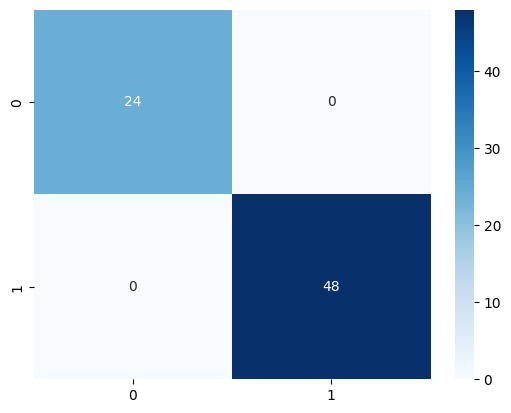

In [ ]:
import seaborn as sns
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')

In [ ]:
# entire dataset
pred_fullDS = (model.predict(X) > 0.5).astype(int)
accuracy_score(y, pred_fullDS)

14/14 [==============================] - 0s 3ms/step


0.9862068965517241

<Axes: >

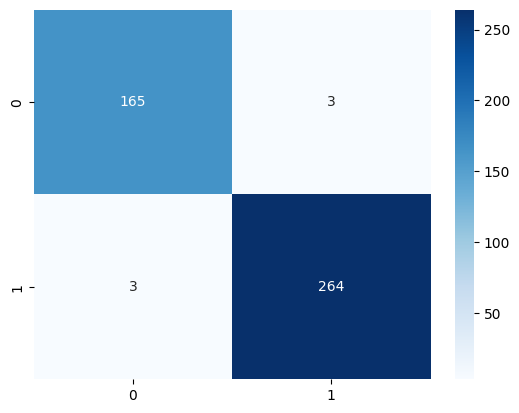

In [ ]:
conf = confusion_matrix(y, pred_fullDS)
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')